<a href="https://colab.research.google.com/github/Andro2k/Prueba-2-Metodos/blob/main/Prueba_2_Andino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minimos Cuadrados**

In [56]:
from typing import Callable # Import the Callable type hint

# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]], # Now Callable is defined
) -> None:
    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."
    n = len(xs)
    num_pars = len(gradiente)
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)
    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."
        Ab[i, :] = der_parcial(xs, ys)
    params, _, _, _ = np.linalg.lstsq(Ab[:, :-1], Ab[:, -1], rcond=None)
    return params

[ 2.02441048 -1.12332513 -0.63825562]


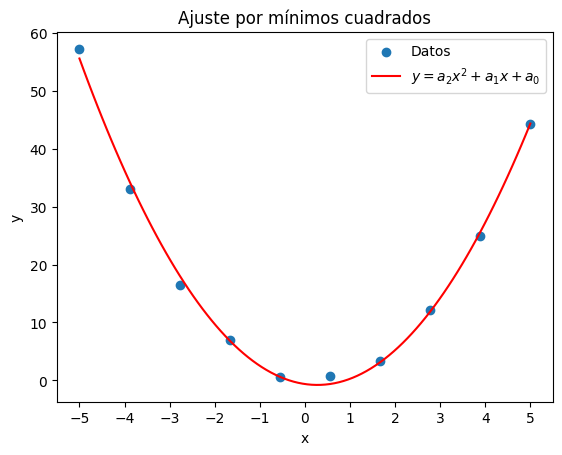

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos 2
xs2 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys2 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# Definición de nuevas derivadas parciales
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))
    return c_2, c_1, c_0, c_ind

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))
    return c_2, c_1, c_0, c_ind

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return c_2, c_1, c_0, c_ind

# Función de la parábola
def parabola(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

# Ajuste de los datos a una parábola
pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])
print(pars) # parámetros de la curva ajustada

# Graficar la función cuadrática ajustada y los puntos dados
x = np.linspace(-5, 5, 100)
y = [parabola(xi, pars) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()

# Ajustar los ticks de los ejes
plt.xticks(np.arange(-5, 6, 1))  # De -5 a 5 con incrementos de 1 en 1
plt.yticks(np.arange(0, 70, 10))  # De 0 a 70 con incrementos de 10 en 10

plt.show()


# **texto en negrita**